Let $P(y)$ be the true distribution over the hypothesis space $\mathcal{Y}$.  
Let $D = \{y_0, y_1,..., y_d\}$ be the finite samples from $P(y)$.  
Empirical distribution is defined as:

$$\hat{P}(y) = \frac{\sum_{y' \in D} \mathbb{I}(y = y')}{|D|}$$

Assume $P(y)$ is observable for $y \in D$. 
We can weight the observed samples using $P(y)$ as follows.

$$C(y) = \mathbb{I}(y \in D) \cdot P(y)$$

By normalizing $C$ to be a probability distribution,

$$\hat{P}^{'}(y) = \frac{C(y)}{\sum_{y' \in \mathcal{Y}} C(y')}.$$

We denote $\hat{P}^{'}$ as the model-based estimation.

Q. Is $\hat{P}^{'}(y)$ a better estimate of the $P(y)$?

A. Yes, with respect to the divergence.


## Empirical Evaluation

In [1]:
import numpy as np
import scipy
from scipy import stats
from scipy.spatial import distance
import matplotlib.pyplot as plt
np.random.seed(0)

In [6]:
def KL(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)

    kl = 0.0
    for i in range(a.shape[0]):
        if a[i] != 0 and b[i] != 0:
            kl += a[i] * np.log(a[i] / b[i])
    return kl


def total_variation_distance(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)

    return 0.5 * np.sum(np.abs(a - b))

def jsd(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)

    m = 0.5 * (a + b)
    return 0.5 * (KL(a, m) + KL(b, m))

We run simulation using the probability density of the Zipf distribution:

$$P(y) = \frac{y^{-a}}{\zeta(a)}$$

In [132]:
# a determines the steepness of the line which corresponds to the "confidence" of the language model.
a = 2.0

# ysize determines the number of possible hypotheses. For sequence generation, it is as large as infinite.
ysize = 500

# ssize is the number of samples. Around 100 for MBR decoding.
ssize = 100

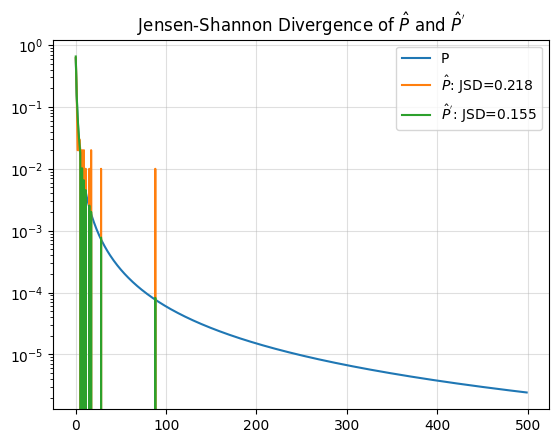

In [135]:
# We use the zipfian distribution as the target distribution
rv = stats.zipfian(a, ysize)
P = rv.pmf(np.arange(ysize+1))[1:]

# We generate a sample from the target distribution
D = rv.rvs(size=ssize)

# We compute the empirical distribution Phat
count = np.bincount(D)
count.resize(ysize+1)
count = count[1:]
Phat = count / ssize

# We compute the adjusted empirical distribution Phatdash
Phatdash = np.where(count > 0, 1, 0)
Phatdash = Phatdash * P
Phatdash = Phatdash / np.sum(Phatdash)

# Compute JS divergence
Phat_distance = distance.jensenshannon(P, Phat)
Phatdash_distance = distance.jensenshannon(P, Phatdash)

# Plot
plt.plot(P, label='P')
plt.plot(Phat, label='$\hat{P}$' + ': JSD={:.3f}'.format(Phat_distance))
plt.plot(Phatdash, label='$\hat{P}^{\'}$' + ': JSD={:.3f}'.format(Phatdash_distance))
plt.semilogy()
plt.grid(alpha=0.4)
plt.legend()
plt.title('Jensen-Shannon Divergence of $\hat{P}$ and $\hat{P}^{\'}$')
plt.show()